In [1]:
# Generic imports
import pandas as pd
import plotly
import plotly.graph_objects as go

# 5G visualization logic
import trace_plotting
from utils.wireshark import import_pcap_as_dataframe
import logging
import re
import platform

In [2]:
# Wireshark trace with 5GC messages
#wireshark_trace = 'D:\\Temp\\free5gc.pcap'
#wireshark_trace = 'D:\\Temp\\volte_calls_2.pcapng'
wireshark_trace = 'D:\\Temp\\s1ap_volte.pcapng'
#wireshark_trace = 'D:\\Temp\\SIP MT offnet.pcap'

In [3]:
if isinstance(wireshark_trace, list):
    output_name_files = wireshark_trace[0]
else:
    output_name_files = wireshark_trace
output_name_files = '.'.join(output_name_files.split('.')[0:-1])

http2_ports= "29502,29503,29504,29507,29509,29518,"
# DEBUG loggig level for big traces so that you can see if processing is stuck or not
packets_df = import_pcap_as_dataframe(
    wireshark_trace, 
    http2_ports = http2_ports+"32445,5002,5000,32665,80,32077,5006,8080,3000,8081,29502,37904",
    wireshark_version = 'OS',
    platform = platform.system(),
    logging_level=logging.INFO,
    remove_pdml=True)
display(packets_df)

,ip_src,ip_dst,port_src,port_dst,transport_protocol,frame_number,protocol,msg_description,timestamp,timestamp_offset,datetime,summary_raw,summary,file,file_idx
0,127.0.0.100,127.0.0.101,42104,36412,sctp,1,S1AP,S1AP-PDU: 000c408091000005000800020002001a0069...,1.639401e+09,0.000000,2021-12-13 13:09:43.979245186,S1AP initialUEMessage (12),NAS-EPS initialUEMessage (12),D:\Temp\s1ap_volte.pcapng,0
1,127.0.0.101,127.0.0.100,36412,42104,sctp,2,S1AP,S1AP-PDU: 000b40380000030000000200020008000200...,1.639401e+09,0.001688,2021-12-13 13:09:43.980933189,S1AP downlinkNASTransport (11),NAS-EPS downlinkNASTransport (11),D:\Temp\s1ap_volte.pcapng,0
2,127.0.0.100,127.0.0.101,42104,36412,sctp,3,S1AP,S1AP-PDU: 000d40350000050000000200020008000200...,1.639401e+09,0.359906,2021-12-13 13:09:44.339151144,S1AP uplinkNASTransport (13),NAS-EPS uplinkNASTransport (13),D:\Temp\s1ap_volte.pcapng,0
3,127.0.0.101,127.0.0.100,36412,42104,sctp,4,S1AP,S1AP-PDU: 000b402f0000030000000200020008000200...,1.639401e+09,0.360299,2021-12-13 13:09:44.339544535,S1AP downlinkNASTransport (11),NAS-EPS downlinkNASTransport (11),D:\Temp\s1ap_volte.pcapng,0
4,127.0.0.100,127.0.0.101,42104,36412,sctp,5,S1AP,S1AP-PDU: 000d403d0000050000000200020008000200...,1.639401e+09,0.379930,2021-12-13 13:09:44.359175205,S1AP uplinkNASTransport (13),NAS-EPS uplinkNASTransport (13),D:\Temp\s1ap_volte.pcapng,0
5,127.0.0.101,127.0.0.100,36412,42104,sctp,6,S1AP,S1AP-PDU: 000b401d0000030000000200020008000200...,1.639401e+09,0.381722,2021-12-13 13:09:44.360966921,S1AP downlinkNASTransport (11),NAS-EPS downlinkNASTransport (11),D:\Temp\s1ap_volte.pcapng,0
6,127.0.0.100,127.0.0.101,42104,36412,sctp,7,S1AP,S1AP-PDU: 000d403e0000050000000200020008000200...,1.639401e+09,0.400008,2021-12-13 13:09:44.379253387,S1AP uplinkNASTransport (13),NAS-EPS uplinkNASTransport (13),D:\Temp\s1ap_volte.pcapng,0
7,127.0.0.101,127.0.0.100,36412,42104,sctp,8,S1AP,S1AP-PDU: 00090080d500000700000002000200080002...,1.639401e+09,0.402546,2021-12-13 13:09:44.381791353,S1AP InitialContextSetup (9),NAS-EPS InitialContextSetup (9),D:\Temp\s1ap_volte.pcapng,0
8,127.0.0.100,127.0.0.101,42104,36412,sctp,10,S1AP,S1AP-PDU: 200900220000030000400200020008400200...,1.639401e+09,0.650056,2021-12-13 13:09:44.629301071,"S1AP InitialContextSetup (9),\nS1AP uplinkNAST...",NAS-EPS uplinkNASTransport (13),D:\Temp\s1ap_volte.pcapng,0
9,127.0.0.101,127.0.0.100,36412,42104,sctp,11,S1AP,S1AP-PDU: 000b403a0000030000000200020008000200...,1.639401e+09,0.650767,2021-12-13 13:09:44.630011797,S1AP downlinkNASTransport (11),NAS-EPS downlinkNASTransport (11),D:\Temp\s1ap_volte.pcapng,0


In [4]:
procedure_df, procedure_frames_df = trace_plotting.calculate_procedure_length(packets_df)
#pd.set_option('display.max_rows', 10)
#display(procedure_df)

display('Average procedure length (ms)')
mean_values = procedure_df.groupby('name')['length_ms'].mean()
min_values = procedure_df.groupby('name')['length_ms'].min()
max_values = procedure_df.groupby('name')['length_ms'].max()
count_values = procedure_df.groupby('name')['length_ms'].count()
summary_values = mean_values.reset_index()
summary_values = summary_values.rename(columns={'length_ms':'mean_procedure_time_ms'})
summary_values['min_procedure_time_ms'] = min_values.reset_index()['length_ms']
summary_values['max_procedure_time_ms'] = max_values.reset_index()['length_ms']
summary_values['count'] = count_values.reset_index()['length_ms']
summary_values = summary_values.set_index('name')
display(summary_values)
with open(output_name_files + '_summary.txt', 'w') as f:
    f.write(summary_values.to_string())
#display(procedure_df)
#display(procedure_frames_df)

'Average procedure length (ms)'

,mean_procedure_time_ms,min_procedure_time_ms,max_procedure_time_ms,count
name,,,,


In [5]:
procedure_df

,name,RAN_UE_NGAP_ID,length_ms,start_frame,end_frame,start_timestamp,end_timestamp,start_datetime,end_datetime


In [6]:
procedure_frames_df

,ip_src,ip_dst,port_src,port_dst,transport_protocol,frame_number,protocol,msg_description,timestamp,timestamp_offset,datetime,summary_raw,summary,file,file_idx,AMF-UE-NGAP-ID,RAN-UE-NGAP-ID,HTTP_STREAM,HTTP_PROCEDURE,HTTP_TYPE


In [7]:
import plotly.graph_objects as go

bin_size = 3

procedure_names = list(procedure_df['name'].unique())
procedure_names.sort()
histogram_traces = []

for procedure_name in procedure_names:
    proc_data = procedure_df[procedure_df['name']==procedure_name]
    hist_array, hist_bins, hist_labels = trace_plotting.get_histogram_data(
        proc_data.loc[:,'length_ms'], 
        bin_size, 
        density=False, 
        remove_trailing_zeros=False, 
        output_labels=True,
        label_unit='ms')
    histogram_line = go.Bar(
        x=hist_bins,
        y=hist_array,
        name=procedure_name,
        text=hist_labels,
        opacity=0.65,
        showlegend=True,
        #marker={'line':{'width':0}},
        hovertemplate="<br>".join([
            "duration: %{text}",
            "occurrences: %{y}"])
    )
    histogram_traces.append(histogram_line)

fig = go.Figure(data=histogram_traces, layout = { 'bargap': 0 })

fig.update_layout(barmode='overlay')
fig.update_xaxes(title_text='Procedure length (ms)')
fig.update_yaxes(title_text='Occurrence')
fig.show()

fig.write_html(output_name_files + '_procedure_length.html')

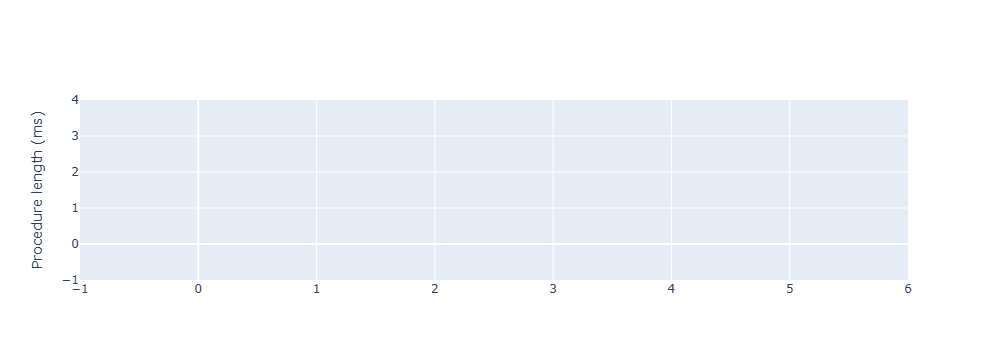

In [8]:
plot_data = trace_plotting.generate_scatterplots_for_wireshark_traces(
    procedure_df, 
    filter_column='name', 
    datetime_column='start_datetime', 
    summary_column='length_ms', 
    protocol_column='name', 
    frame_number_column='start_frame', 
    auto_color=True,
    y_unit='ms',
    hide_series=False,
    opacity=0.65)
fig = go.Figure(data=plot_data)
fig.update_yaxes(title_text='Procedure length (ms)')
fig.show()

fig.write_html(output_name_files + '_procedure_timeline.html')